In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [40]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
pd.DataFrame(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Correlation Heat Map

C:\Users\Chekk\AppData\Local\Temp\ipykernel_23932\1108125198.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].str.strip().replace({'Female': 0, 'Male': 1, 'Other': 2})


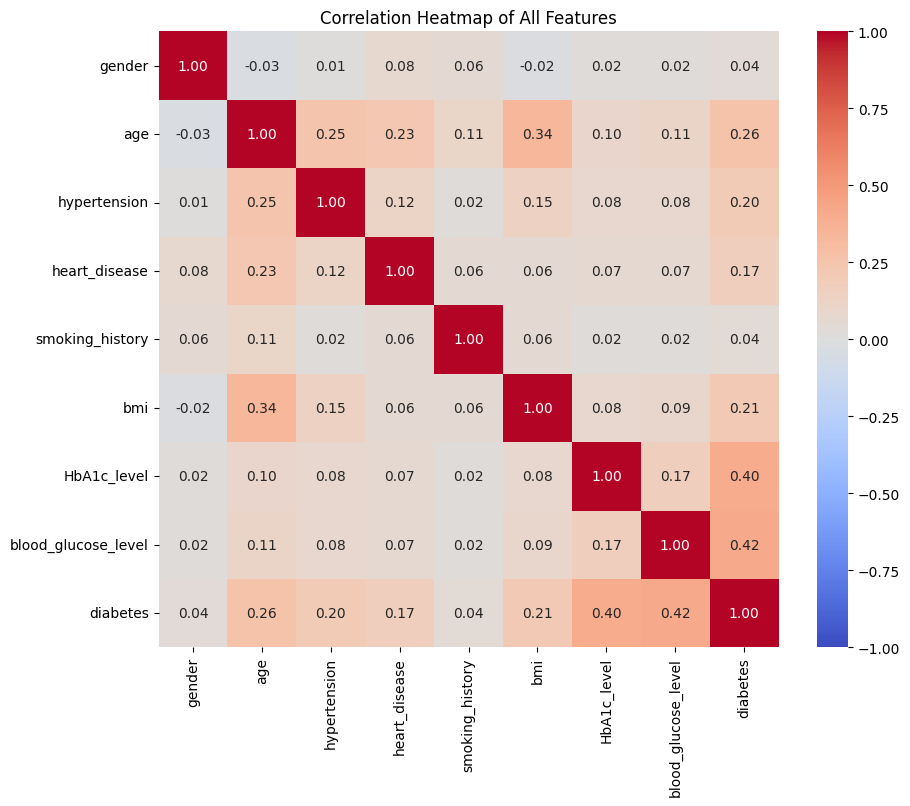

In [41]:
# Preprocess categorical variables
# Encode gender
df['gender'] = df['gender'].str.strip().replace({'Female': 0, 'Male': 1, 'Other': 2})

# Encode smoking_history
smoking_mapping = {'never': 0, 'No Info': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever': 5}
df['smoking_history'] = df['smoking_history'].str.strip().map(smoking_mapping)

# Convert binary variables to integers
binary_cols = ['hypertension', 'heart_disease', 'diabetes']
for col in binary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Convert numerical columns to numeric type
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

In [42]:
x = df.iloc[:, 0:8].values
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,0.0,80.0,0.0,1.0,0.0,25.19,6.6,140.0
1,0.0,54.0,0.0,0.0,1.0,27.32,6.6,80.0
2,1.0,28.0,0.0,0.0,0.0,27.32,5.7,158.0
3,0.0,36.0,0.0,0.0,3.0,23.45,5.0,155.0
4,1.0,76.0,1.0,1.0,3.0,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0.0,0.0,1.0,27.32,6.2,90.0
99996,0.0,2.0,0.0,0.0,1.0,17.37,6.5,100.0
99997,1.0,66.0,0.0,0.0,2.0,27.83,5.7,155.0
99998,0.0,24.0,0.0,0.0,0.0,35.42,4.0,100.0


In [43]:
y = df.iloc[:, -1].values
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0,4])], remainder="passthrough")
x = np.array(ct.fit_transform(x))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,27.32,6.2,90.0
99996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,17.37,6.5,100.0
99997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,66.0,0.0,0.0,27.83,5.7,155.0
99998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,35.42,4.0,100.0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [46]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,16.45,6.2,159.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,24.59,6.0,130.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,21.77,4.5,130.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,27.32,6.2,159.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,18.37,6.5,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,23.68,5.8,130.0
79996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,26.77,6.5,158.0
79997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,41.23,9.0,145.0
79998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37.0,0.0,0.0,30.18,5.8,90.0


In [47]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,27.32,4.8,140.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,27.32,4.8,100.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,0.0,0.0,37.16,6.6,85.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,43.83,5.0,160.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,14.18,4.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,0.0,0.0,27.00,6.2,100.0
19996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,27.32,6.6,90.0
19997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,1.0,28.56,4.8,158.0
19998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,27.32,3.5,145.0


In [48]:
pd.DataFrame(y_train)

,0
0,0
1,0
2,0
3,0
4,0
...,...
79995,0
79996,0
79997,1
79998,0


In [49]:
pd.DataFrame(y_test)

,0
0,0
1,0
2,0
3,0
4,0
...,...
19995,0
19996,0
19997,0
19998,0


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 9:] = sc.fit_transform(x_train[:, 9:])
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.772866,-0.283591,-0.202256,-1.636804,0.628048,0.517745
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.580603,-0.283591,-0.202256,-0.413135,0.441306,-0.195693
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.795954,-0.283591,-0.202256,-0.837059,-0.959261,-0.195693
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.529524,-0.283591,-0.202256,-0.002739,0.628048,0.517745
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.284410,-0.283591,-0.202256,-1.348175,0.908161,-0.195693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.328815,-0.283591,-0.202256,-0.549933,0.254563,-0.195693
79996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.069059,-0.283591,-0.202256,-0.085420,0.908161,0.493144
79997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.069059,-0.283591,-0.202256,2.088323,3.242438,0.173327
79998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.218688,-0.283591,-0.202256,0.427199,0.254563,-1.179744


In [51]:
x_test[:, 9:] = sc.transform(x_test[:, 9:])
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.447388,-0.283591,-0.202256,-0.002739,-0.679147,0.050320
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.625008,-0.283591,-0.202256,-0.002739,-0.679147,-0.933731
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.884764,-0.283591,-0.202256,1.476488,1.001532,-1.302751
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.314173,-0.283591,-0.202256,2.479176,-0.492405,0.542346
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.417625,-0.283591,-0.202256,-1.978049,-1.426116,0.419340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.047742,-0.283591,-0.202256,-0.050844,0.628048,-0.933731
19996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.468704,-0.283591,-0.202256,-0.002739,1.001532,-1.179744
19997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.690730,-0.283591,4.944218,0.183668,-0.679147,0.493144
19998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.314173,-0.283591,-0.202256,-0.002739,-1.892971,0.173327


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
train_pred = lg.predict(x_train)
train_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [95]:
y_pred = lg.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18112,   185],
       [  599,  1104]])

In [56]:
accuracy_score(y_test, y_pred)

0.9608

# K-Nearest_Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5, metric= "minkowski", p=2)
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:

train_pred = knc.predict(x_train)
train_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [59]:
y_pred = knc.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18155,   142],
       [  636,  1067]])

In [61]:
accuracy_score(y_test, y_pred)

0.9611

# SVM

In [62]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [63]:

train_pred = svc.predict(x_train)
train_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [64]:
y_pred = svc.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18199,    98],
       [  671,  1032]])

In [66]:
accuracy_score(y_test, y_pred)

0.96155

# Kernel SVM

In [67]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf", random_state=0)
svc.fit(x_train, y_train)

SVC(random_state=0)

In [68]:

train_pred = knc.predict(x_train)
train_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [69]:
y_pred = svc.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18269,    28],
       [  690,  1013]])

In [71]:
accuracy_score(y_test, y_pred)

0.9641

# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [73]:
train = nb.predict(x_train)
train

array([0, 1, 0, ..., 1, 1, 0], shape=(80000,))

In [74]:
y_pred = nb.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11337,  6960],
       [   61,  1642]])

In [76]:
accuracy_score(y_test, y_pred)

0.64895

# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
train = dt.predict(x_train)
train

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [79]:
y_pred = dt.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17742,   555],
       [  453,  1250]])

In [81]:
accuracy_score(y_test, y_pred)

0.9496

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [83]:
train = rf.predict(x_train)
train

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [84]:
y_pred = rf.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18205,    92],
       [  526,  1177]])

In [86]:
accuracy_score(y_test, y_pred)

0.9691

# XGBoost Classifier

In [87]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [88]:
train_pred = classifier.predict(x_train)
train_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(80000,))

In [89]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[18243,    54],
       [  516,  1187]])

In [91]:
accuracy_score(y_test, y_pred)

0.9715

In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.09 %
Standard Deviation: 0.20 %
